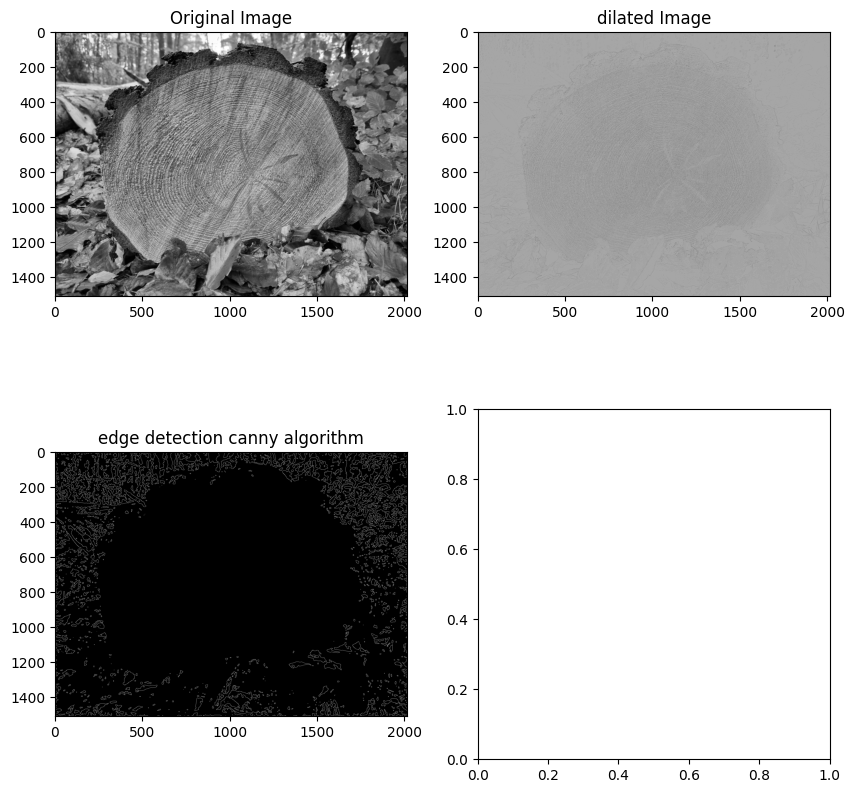

In [65]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np
from scipy.ndimage import gaussian_filter
from skimage.morphology import reconstruction
import scipy.ndimage as nd
import cv2 as cv
# load original image
img = pltimg.imread("./input.tif")
fig,ax =plt.subplots(2,2,figsize=(10,10))
ax[0][0].imshow(img,cmap=plt.get_cmap('gray'))
ax[0][0].title.set_text("Original Image")
# show image
image = cv.Laplacian(img,cv.CV_64F)
seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image
dilated = reconstruction(seed, mask, method='dilation')
ax[0][1].imshow(dilated,cmap=plt.get_cmap('gray'))
ax[0][1].title.set_text("dilated Image")
# make gaussian to blur the inside of the image
gaussianOfDilated = np.uint8(gaussian_filter(dilated,3))
edges = cv.Canny(gaussianOfDilated, 100, 200)
ax[1][0].imshow(edges,cmap=plt.get_cmap('gray'))
ax[1][0].title.set_text("edge detection canny algorithm")
plt.show()